In [1]:
# Welcome to my notebook to review and dig into the 2021 Kaggle Machine Learning & Data Science Survey! 

library(tidyverse) 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
list.files(path = "../input")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "kaggle-survey-2021"

## Loading Survey Data
First things first - I have to load the survey data! 

In [2]:
surveyResults <- read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")

Rows: 25974 Columns: 369

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (369): Time from Start to Finish (seconds), Q1, Q2, Q3, Q4, Q5, Q6, Q7_P...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# Creating a Self-Study Curriculum for Myself

I want to start off with my goals for this survey analysis. Since completing my Google Data Analytics certification in August, I've been working on small projects and using my new skills for my work as an online content manager (with a focus on personal finance). 

I'd love to learn more, but I've quickly discovered there's so much to the data analytics/science field. I'm reviewing the 2021 Kaggle Machine Learning & Data Science Survey to get a clearer idea of where to focus my attention this upcoming year. 



In [3]:
#First off, I'll preview the survey questions asked so I can see which ones are the most relevant and interesting to me.
survey_questions <- head(surveyResults, 1)
survey_questions

Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,⋯,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,⋯,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - ClearML","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - MLflow","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"


Looking over the questions, I'm going to narrow down my focus to three key areas:
* Which programming languages do data professionals use most frequently? 
* Which ML methods and NLP algorithms are they using for their work? 
* Finally, which programming languages, tools, and methods should a beginner learn first?

In [4]:
#Before I dive into that analysis, I admit I'm a bit curious - how many people in the 40-44 range are just starting out? I'd love to see who's in the same situation as I am. 
my_demo <- surveyResults %>%
    filter (Q1 =="40-44", Q6 == "< 1 years")


In [5]:
# Okay, so I'm not alone! Leads me to another question - which programming languages are they using? 

#To find the languages used by newbs, I'll first gather the responses to Q7 and then count
newb_languages <- my_demo %>%
  select(Q7_Part_1:Q7_OTHER) %>%
  gather(Q7_Part_1:Q7_OTHER, key = 'key', value = 'language') %>% 
  filter(!is.na(language))

newb_language_count <- newb_languages  %>% 
  group_by(language)  %>% 
  summarize(count = n()) %>%
  arrange(desc(count))


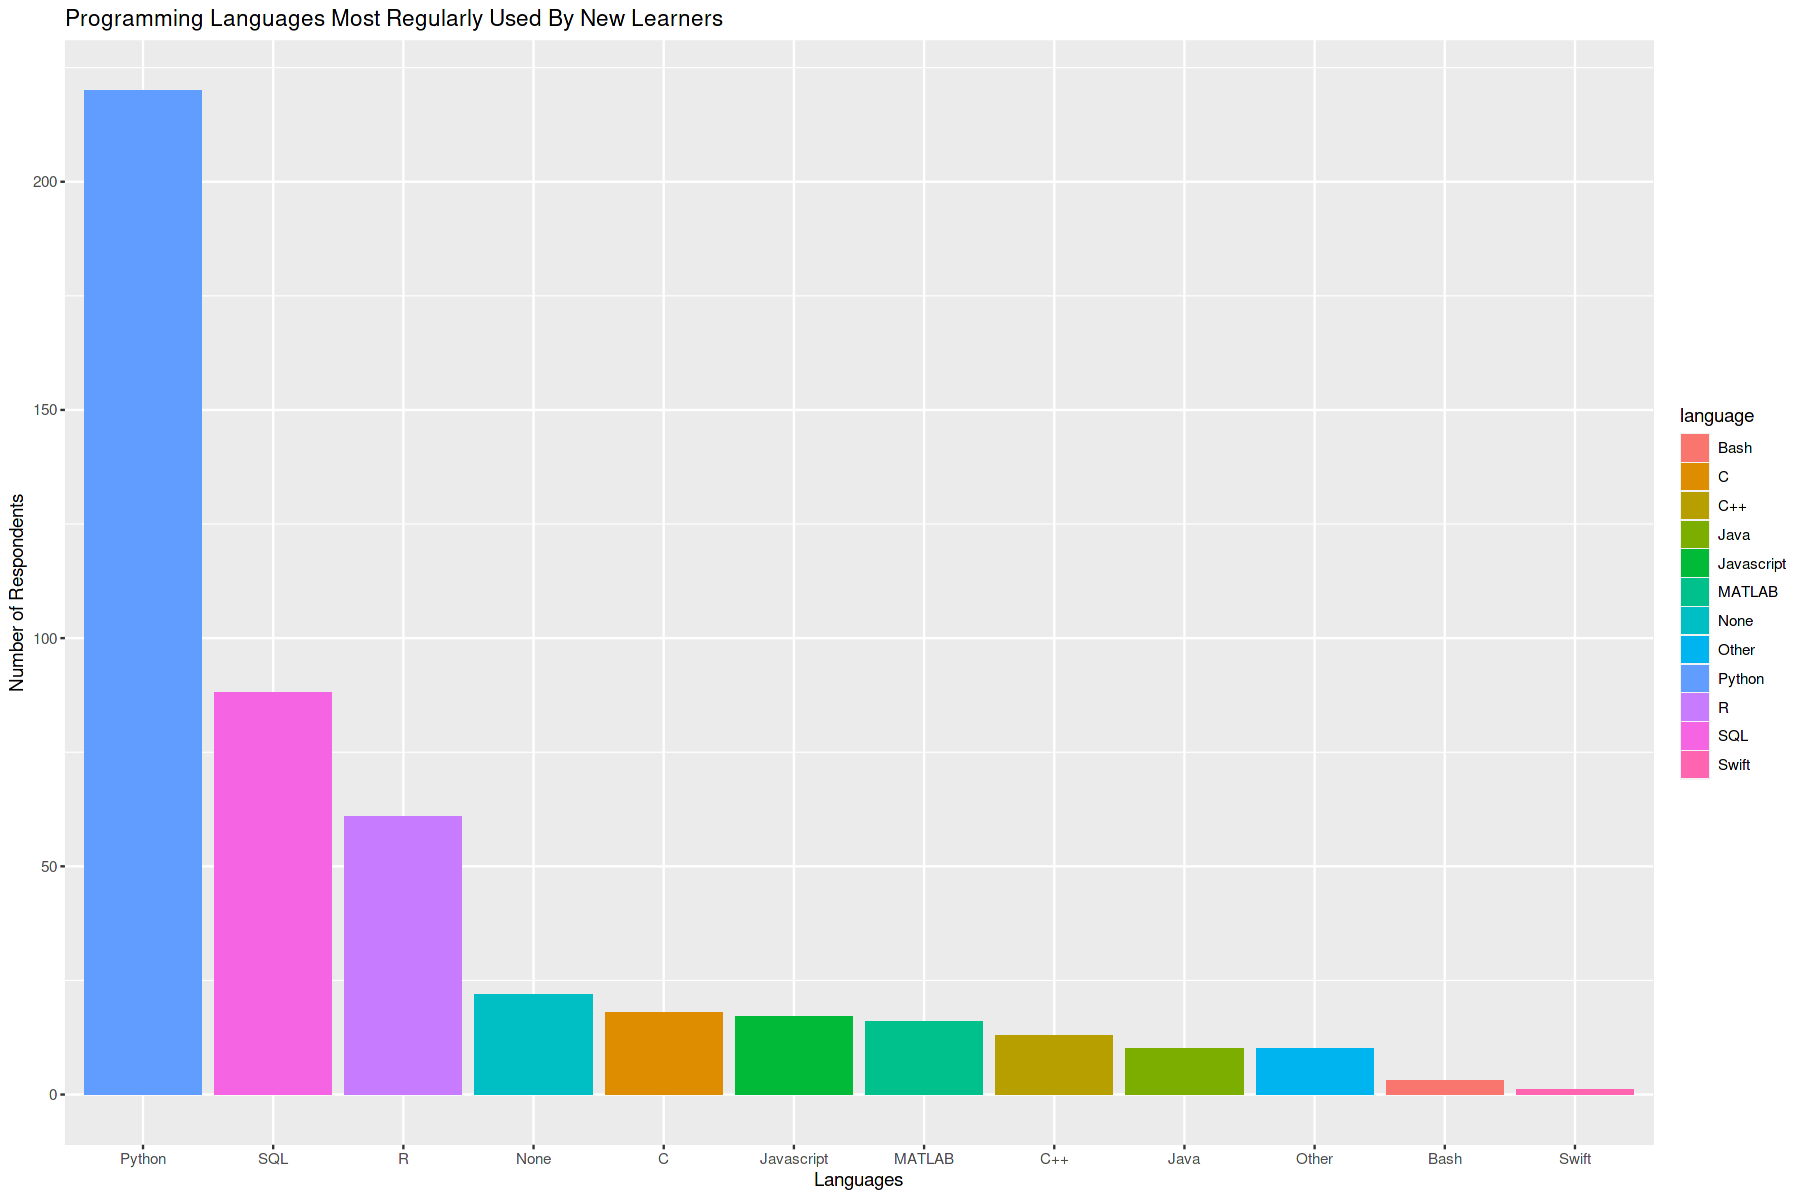

In [6]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(newb_language_count, aes(reorder (language, -count), count)) + 
  geom_bar(aes(fill=language), stat= "identity") +
  xlab("Languages") + ylab("Number of Respondents") +
  labs( title ="Programming Languages Most Regularly Used By New Learners")

In [7]:
# One more thing; I started off with Coursera's Google Data Analytics certificate, but that's not the only path. 
# Let's see which platforms are popular with new learners using answers from question 40

newb_platforms <- my_demo %>%
  select(Q40_Part_1:Q40_OTHER) %>%
  gather(Q40_Part_1:Q40_OTHER, key = 'key', value = 'course') %>% 
  filter(!is.na(course))

newb_platform_count <- newb_platforms  %>% 
  group_by(course)  %>% 
  summarize(count = n()) %>%
  arrange(desc(count))

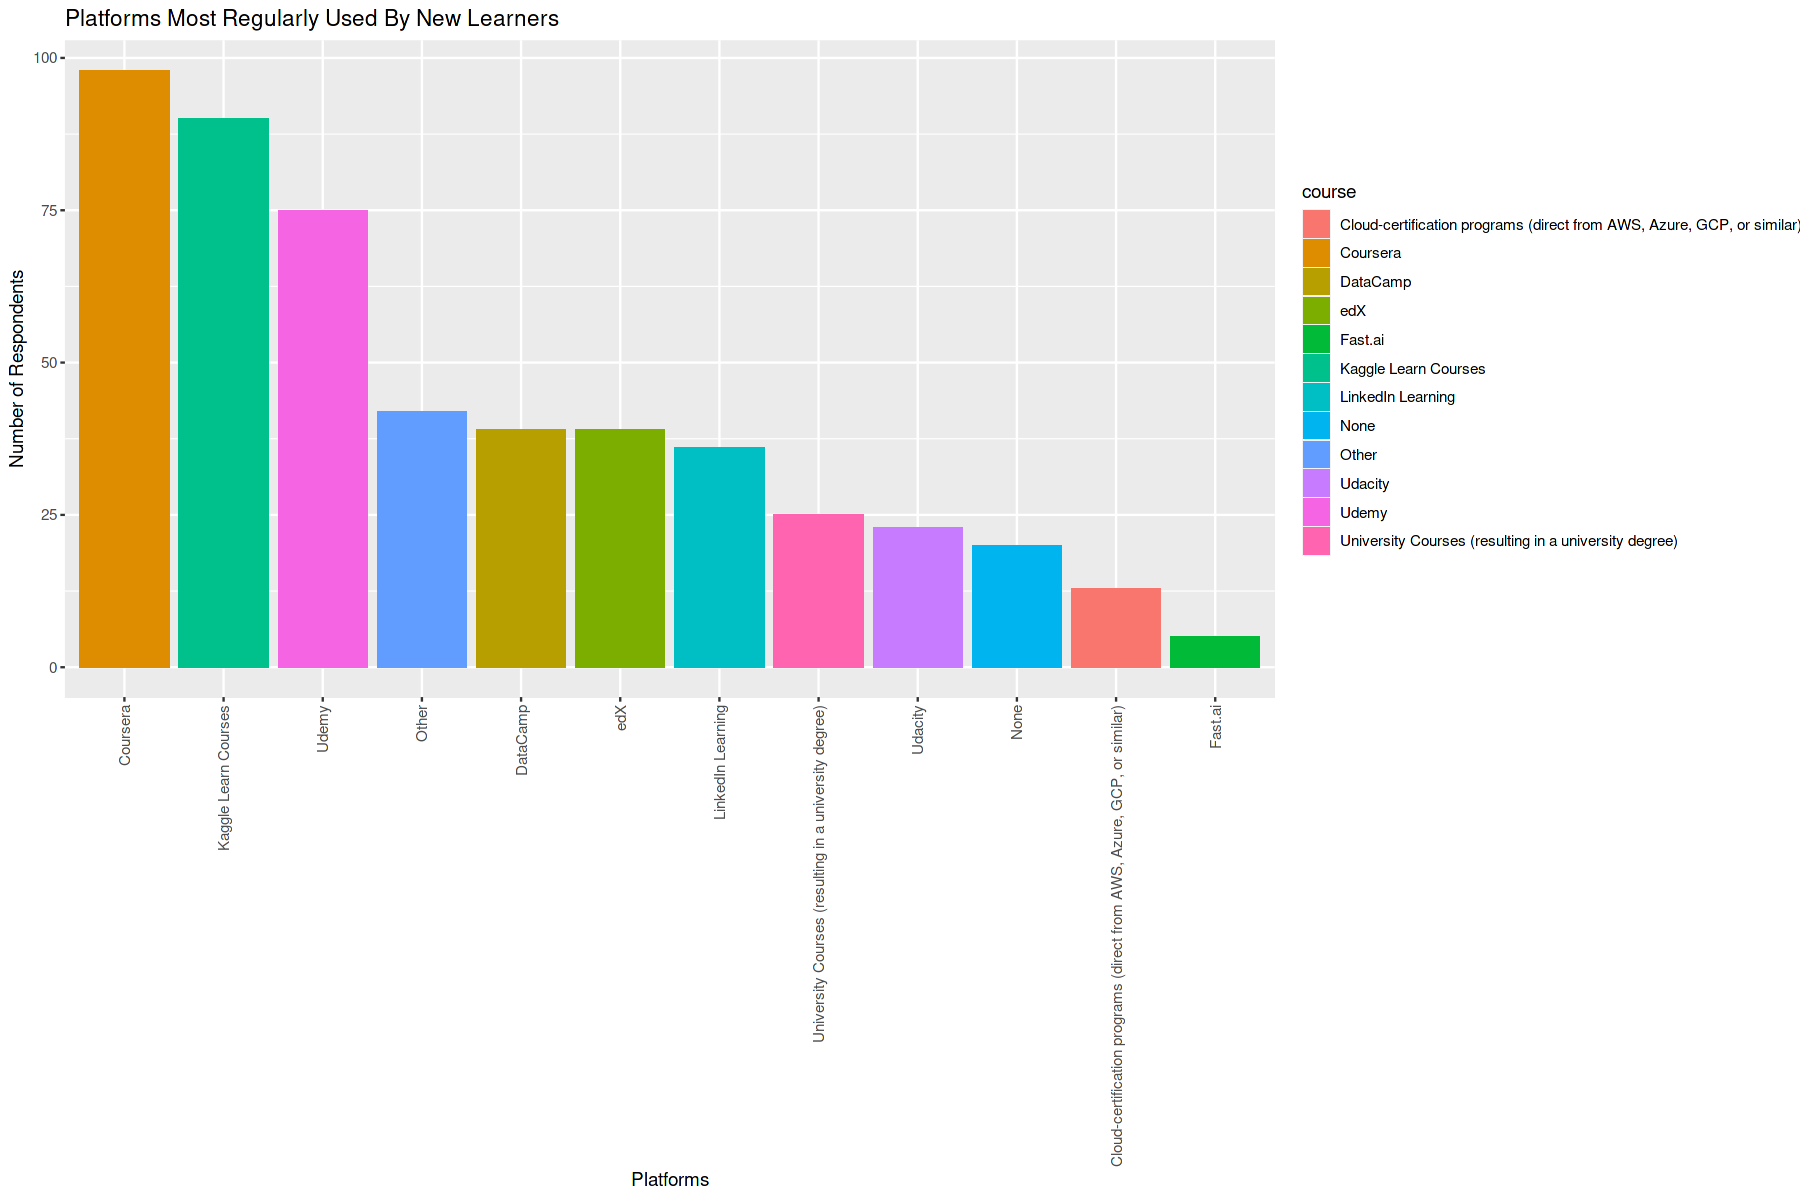

In [8]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(newb_platform_count, aes(reorder (course, -count), count)) + 
  geom_bar(aes(fill=course), stat= "identity") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
  xlab("Platforms") + ylab("Number of Respondents") +
  labs( title ="Platforms Most Regularly Used By New Learners")

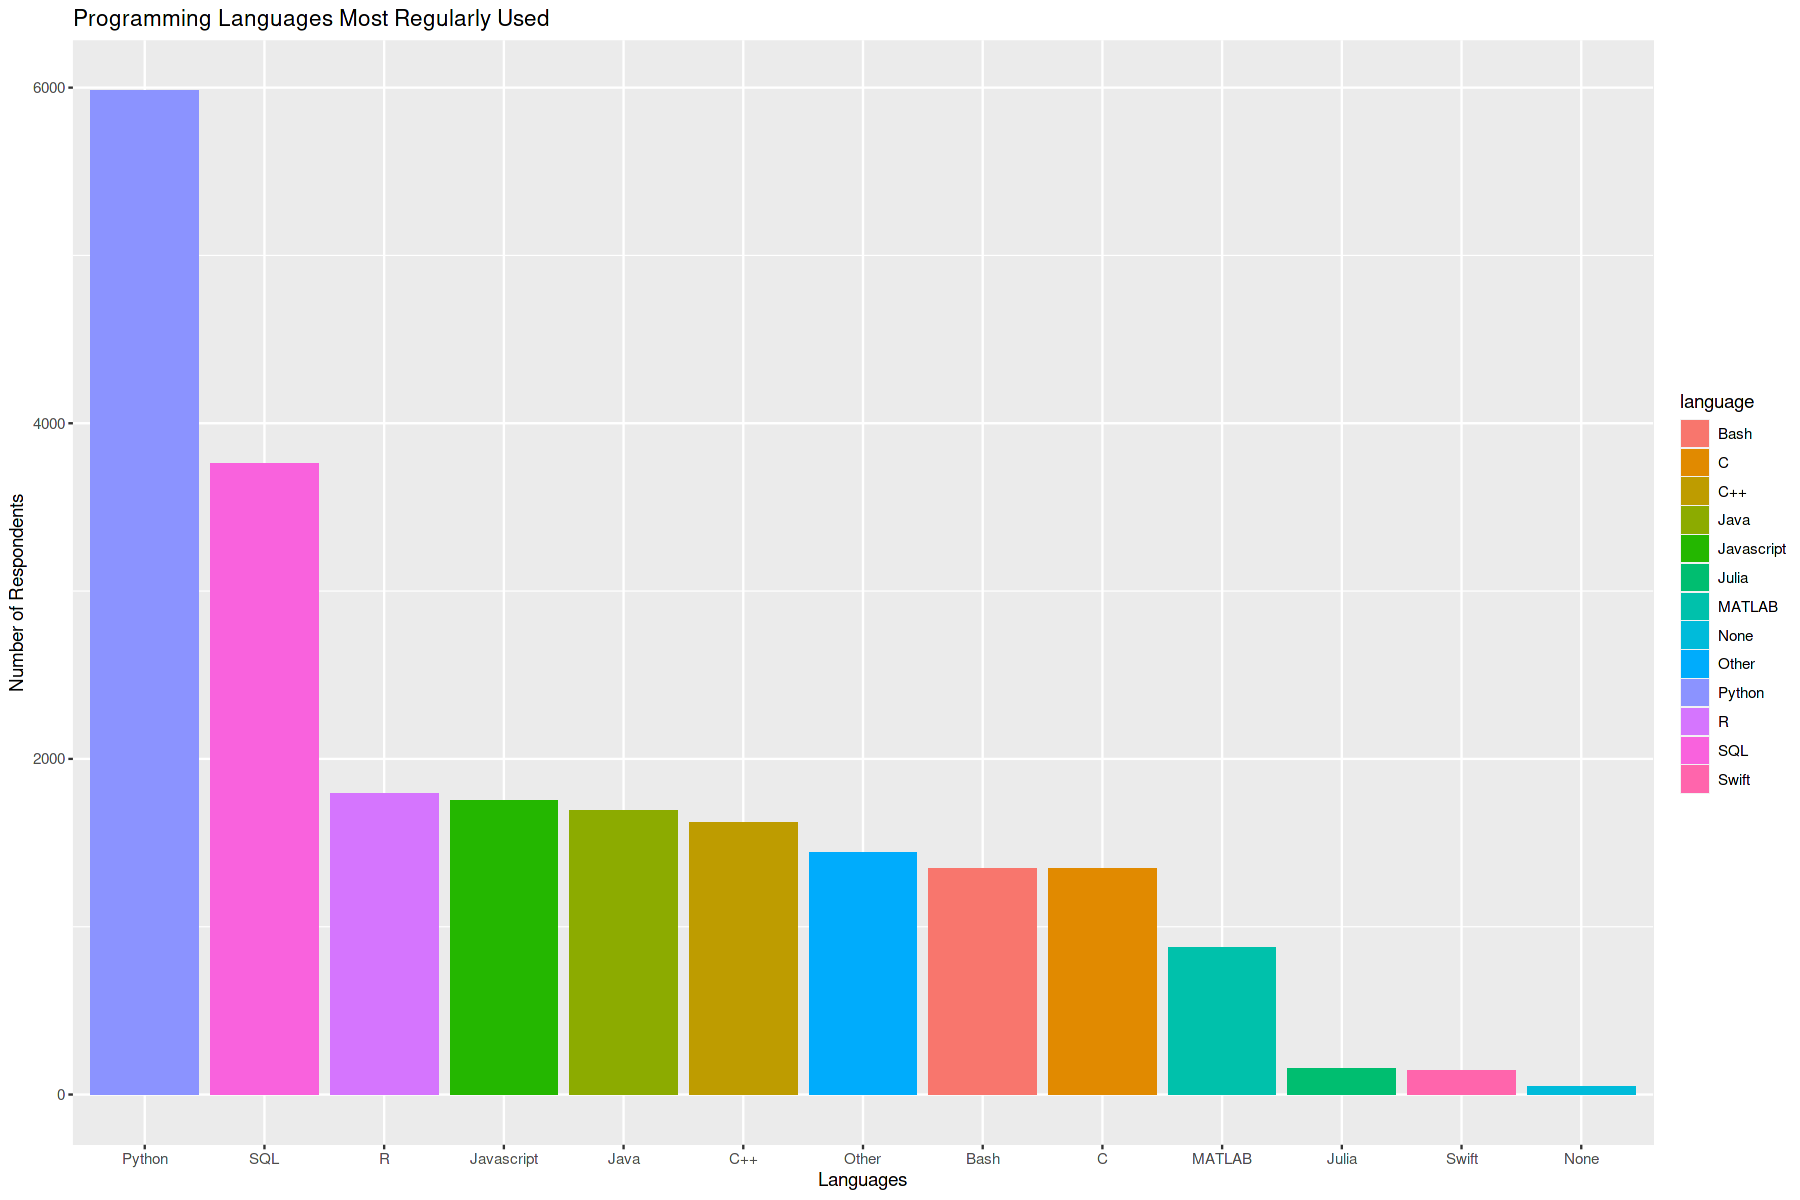

In [9]:
# With that out of the way, I'll review the survey results to see which programming languages pros (5 years as the minimum) are using and recommending for beginners 

data_pros <- surveyResults %>%
  filter (Q6 == "5-10 years" |Q6 == "10-20 years" | Q6 == "20+ years" )

pro_languages <- data_pros %>%
    select(Q7_Part_1:Q7_OTHER) %>%
    gather(Q7_Part_1:Q7_OTHER, key = 'key', value = 'language') %>% 
    filter(!is.na(language))

pro_language_count <- pro_languages  %>% 
  group_by(language)  %>% 
  summarize(count = n()) %>%
  arrange(desc(count))

options(repr.plot.width=15, repr.plot.height=10)
ggplot(pro_language_count, aes(reorder (language, -count), count)) + 
  geom_bar(aes(fill=language), stat= "identity") +
  xlab("Languages") + ylab("Number of Respondents") +
  labs( title ="Programming Languages Most Regularly Used")



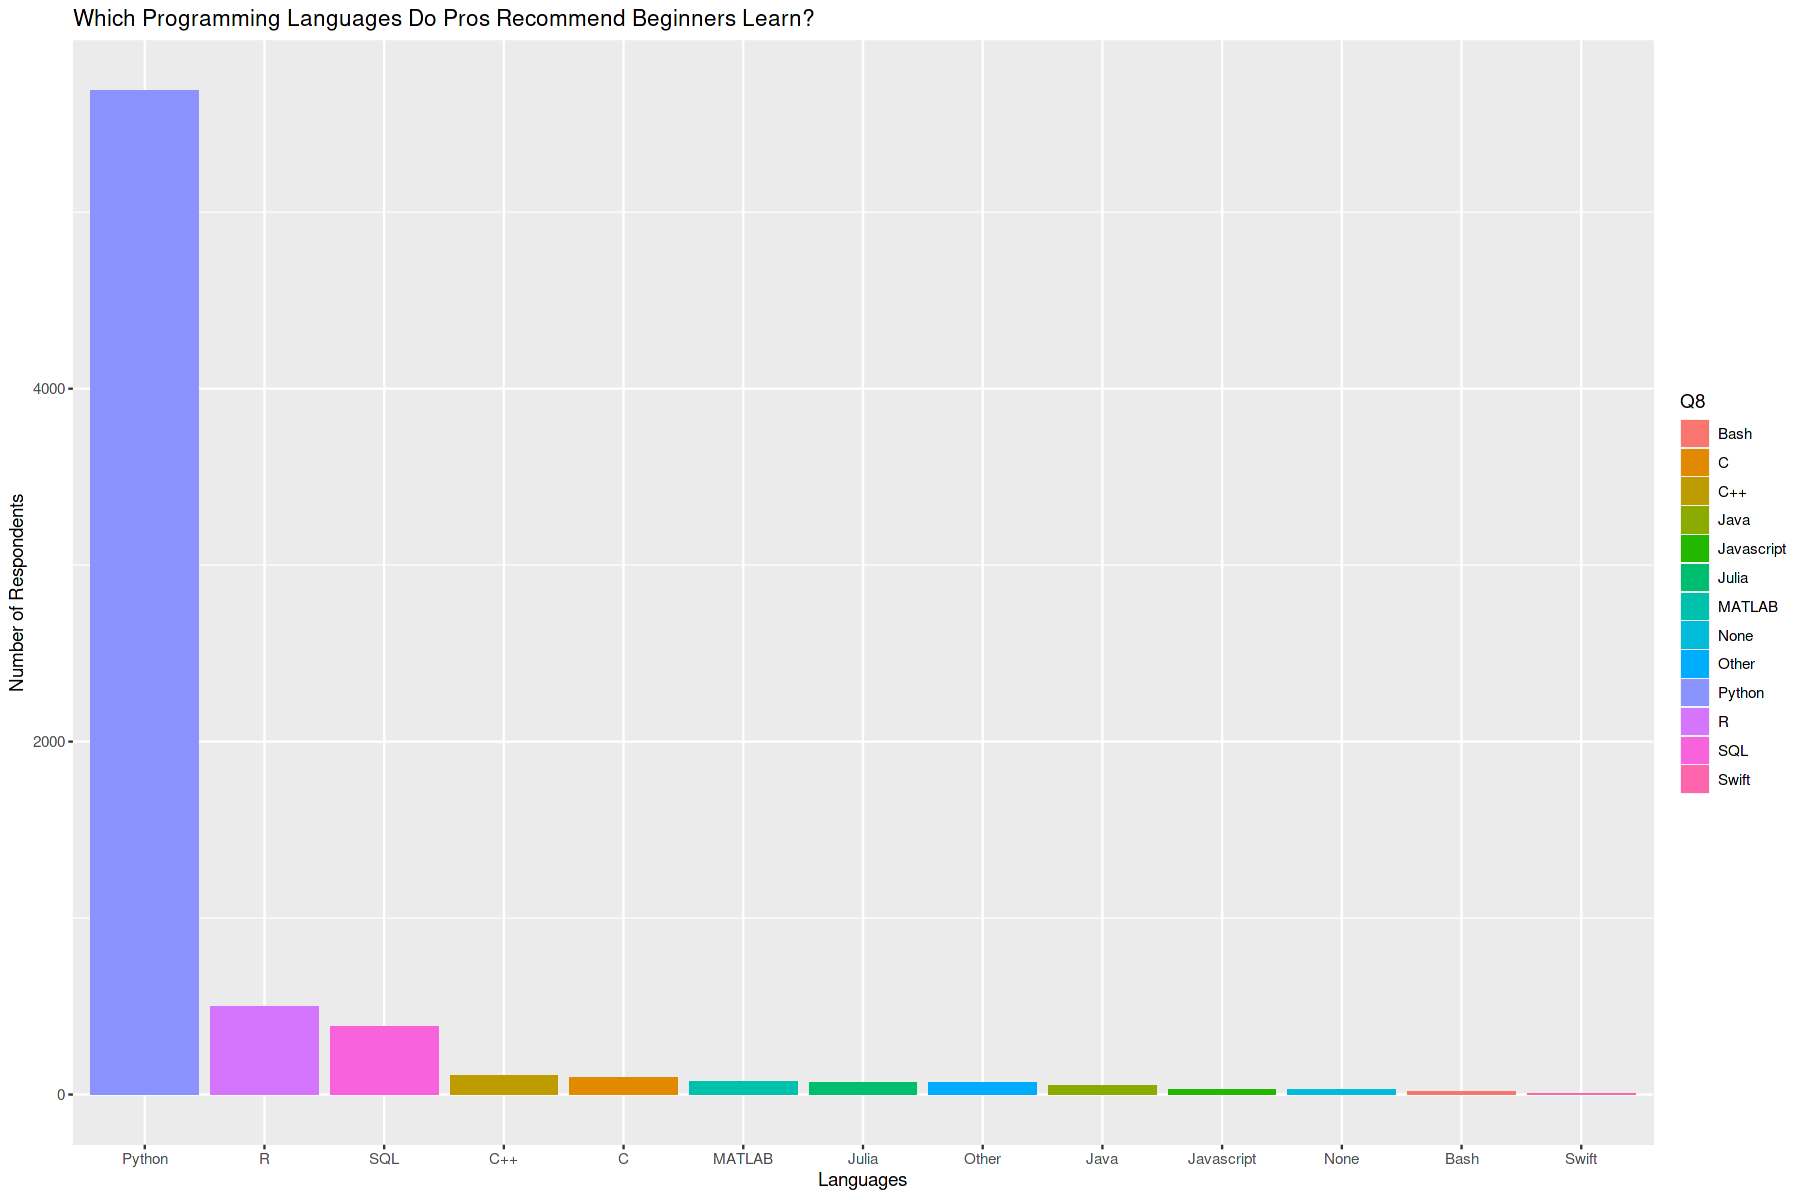

In [10]:
# Now let's see which programming language pros would recommend for new learners. 
pro_recommend <- data_pros %>%
  group_by(Q8)  %>% 
  summarize(count = n()) %>%
  arrange(desc(count)) %>%
  filter(!is.na(Q8))

# Graphing the recommendations
options(repr.plot.width=15, repr.plot.height=10)
ggplot(pro_recommend, aes(reorder (Q8, -count), count)) + 
  geom_bar(aes(fill=Q8), stat= "identity") +
  xlab("Languages") + ylab("Number of Respondents") +
  labs( title ="Which Programming Languages Do Pros Recommend Beginners Learn?")

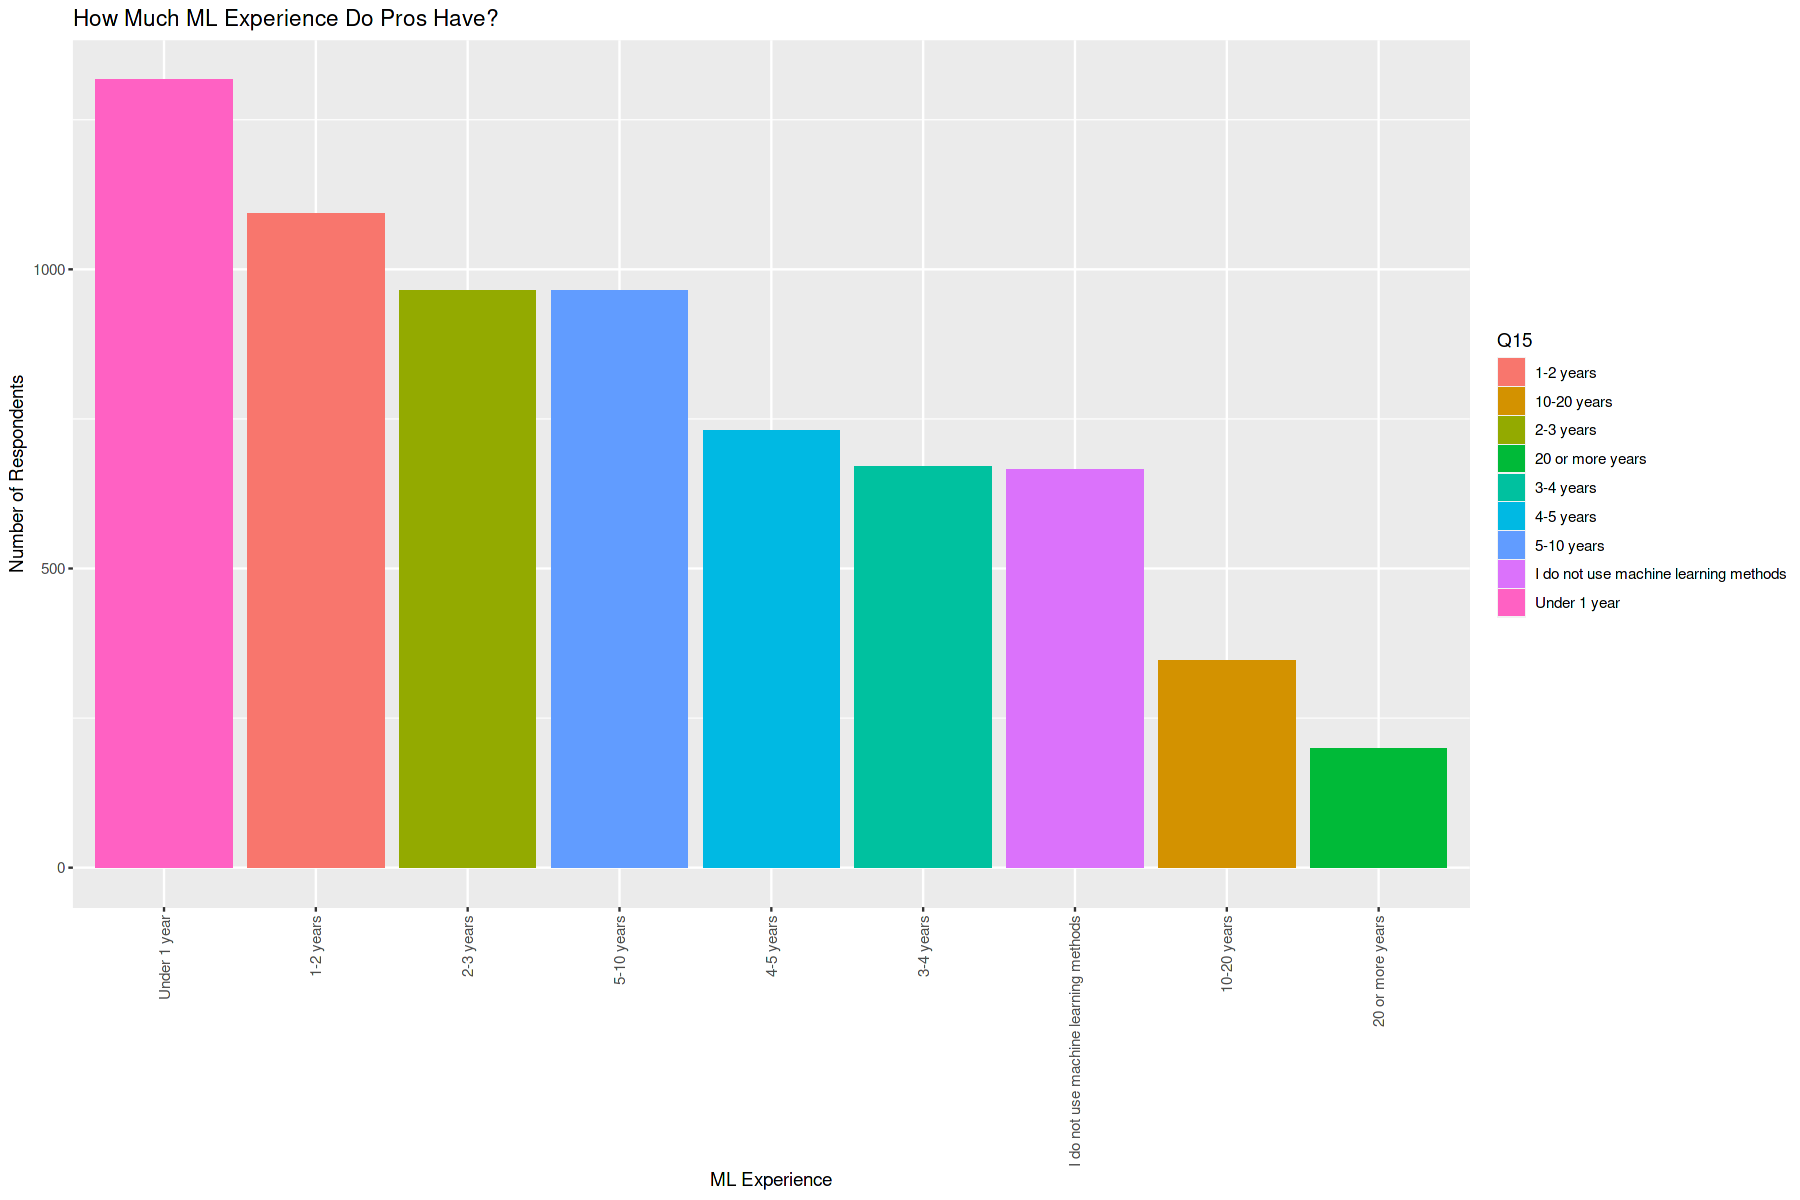

In [11]:
# Alright, so it looks like I need to add learning some Python in my plans (Not going to give up on R - actually enjoy it!) 

# I'm also curious - I hear a lot about machine learning, but is there anything specific I should focus on? 
# I'll dig into Q16 and Q17 to find out. Yet, I'd like to know; at this junction of their programming career, how long have pros used ML methods? 

pro_ML_xp <- data_pros %>%
  group_by(Q15)  %>% 
  summarize(count = n()) %>%
  arrange(desc(count)) %>%
  filter(!is.na(Q15))

# Graphing their ML experience
options(repr.plot.width=15, repr.plot.height=10)
ggplot(pro_ML_xp, aes(reorder (Q15, -count), count)) + 
  geom_bar(aes(fill=Q15), stat= "identity") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))+
  xlab("ML Experience") + ylab("Number of Respondents") +
  labs( title ="How Much ML Experience Do Pros Have?")


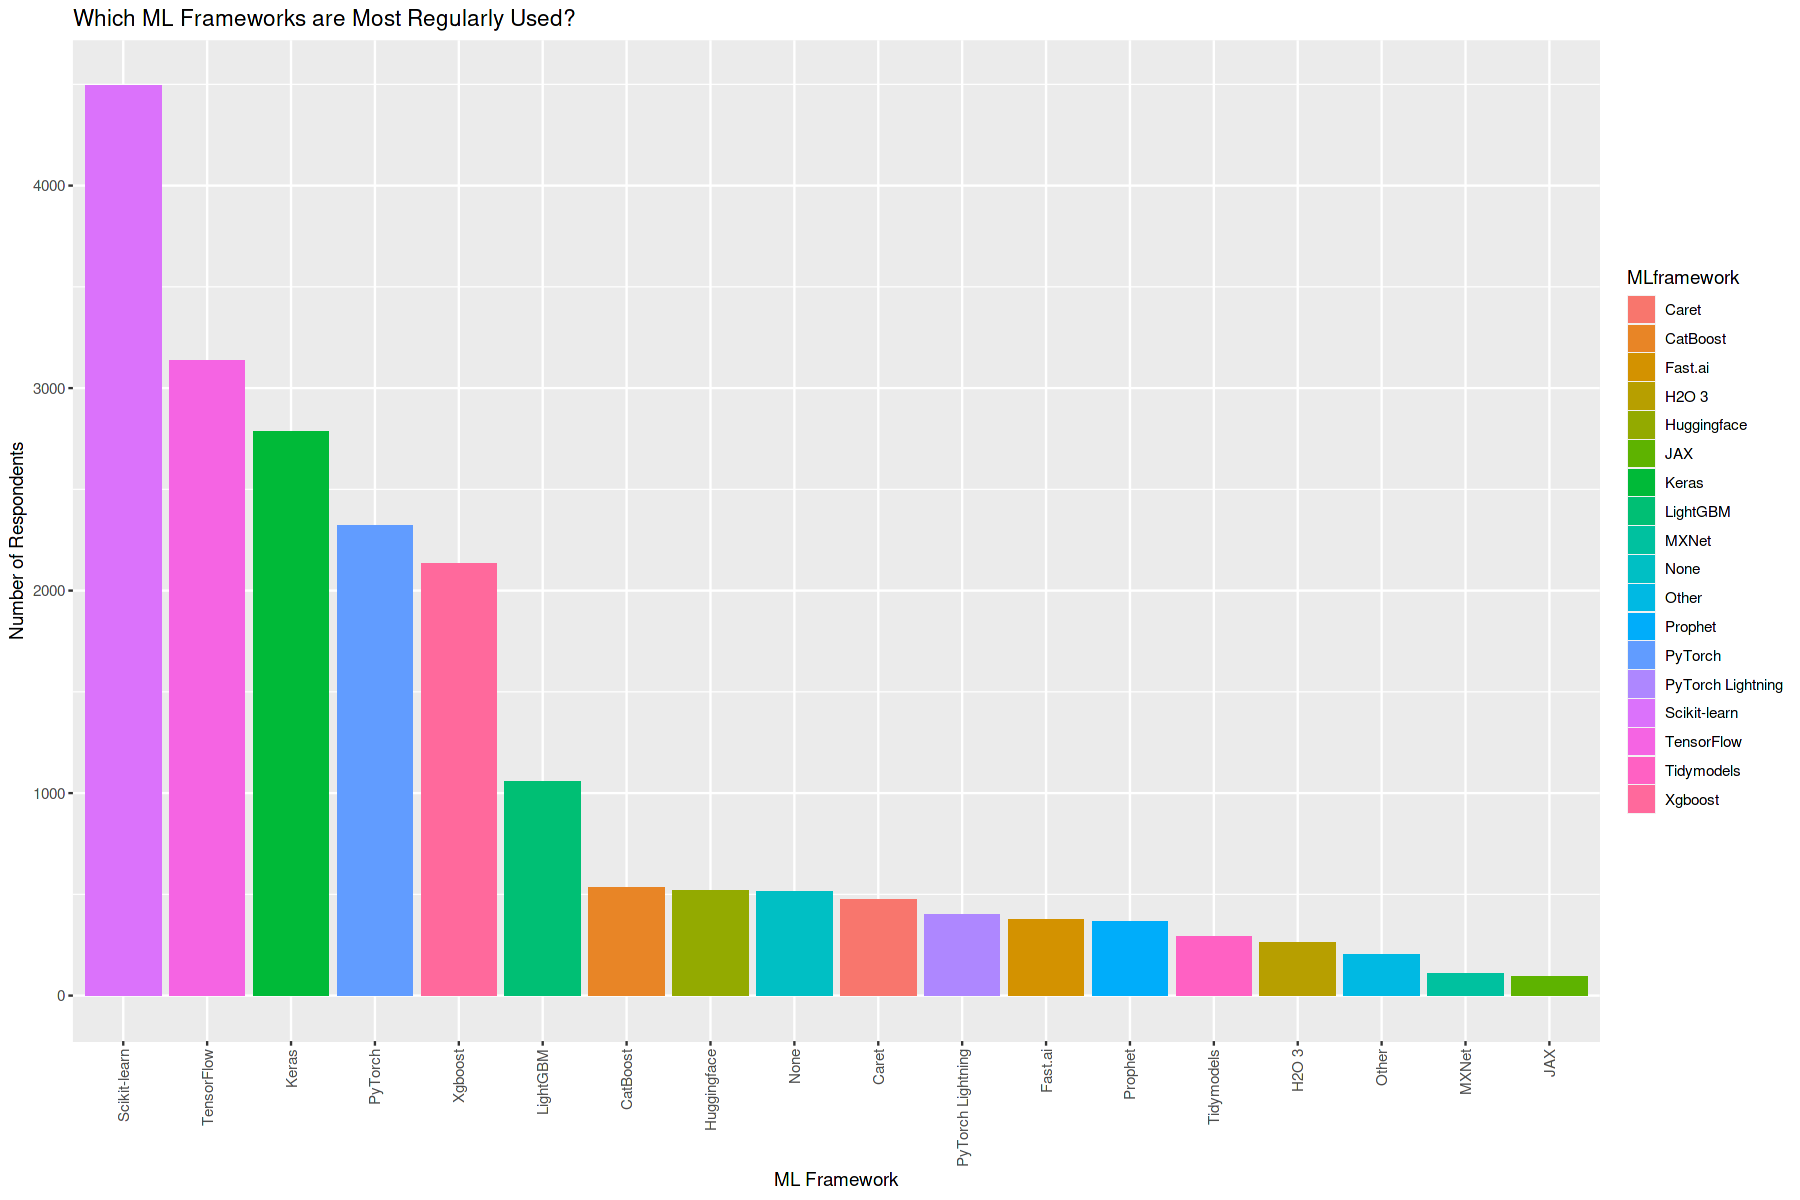

In [12]:
# Okay good to know. After I get the foundations down, which ML frameworks should I look at? Let's see what the data professionals use. 

pro_MLframework <- data_pros %>%
  select(Q16_Part_1:Q16_OTHER) %>%
  gather(Q16_Part_1:Q16_OTHER, key = 'key', value = 'MLframework') %>% 
  filter(!is.na(MLframework))

pro_MLframework_count <- pro_MLframework  %>% 
  group_by(MLframework)  %>% 
  summarize(count = n()) %>%
  arrange(desc(count))

options(repr.plot.width=15, repr.plot.height=10)
ggplot(pro_MLframework_count, aes(reorder (MLframework, -count), count)) + 
  geom_bar(aes(fill=MLframework), stat= "identity") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))+
  xlab("ML Framework") + ylab("Number of Respondents") +
  labs( title ="Which ML Frameworks are Most Regularly Used?")

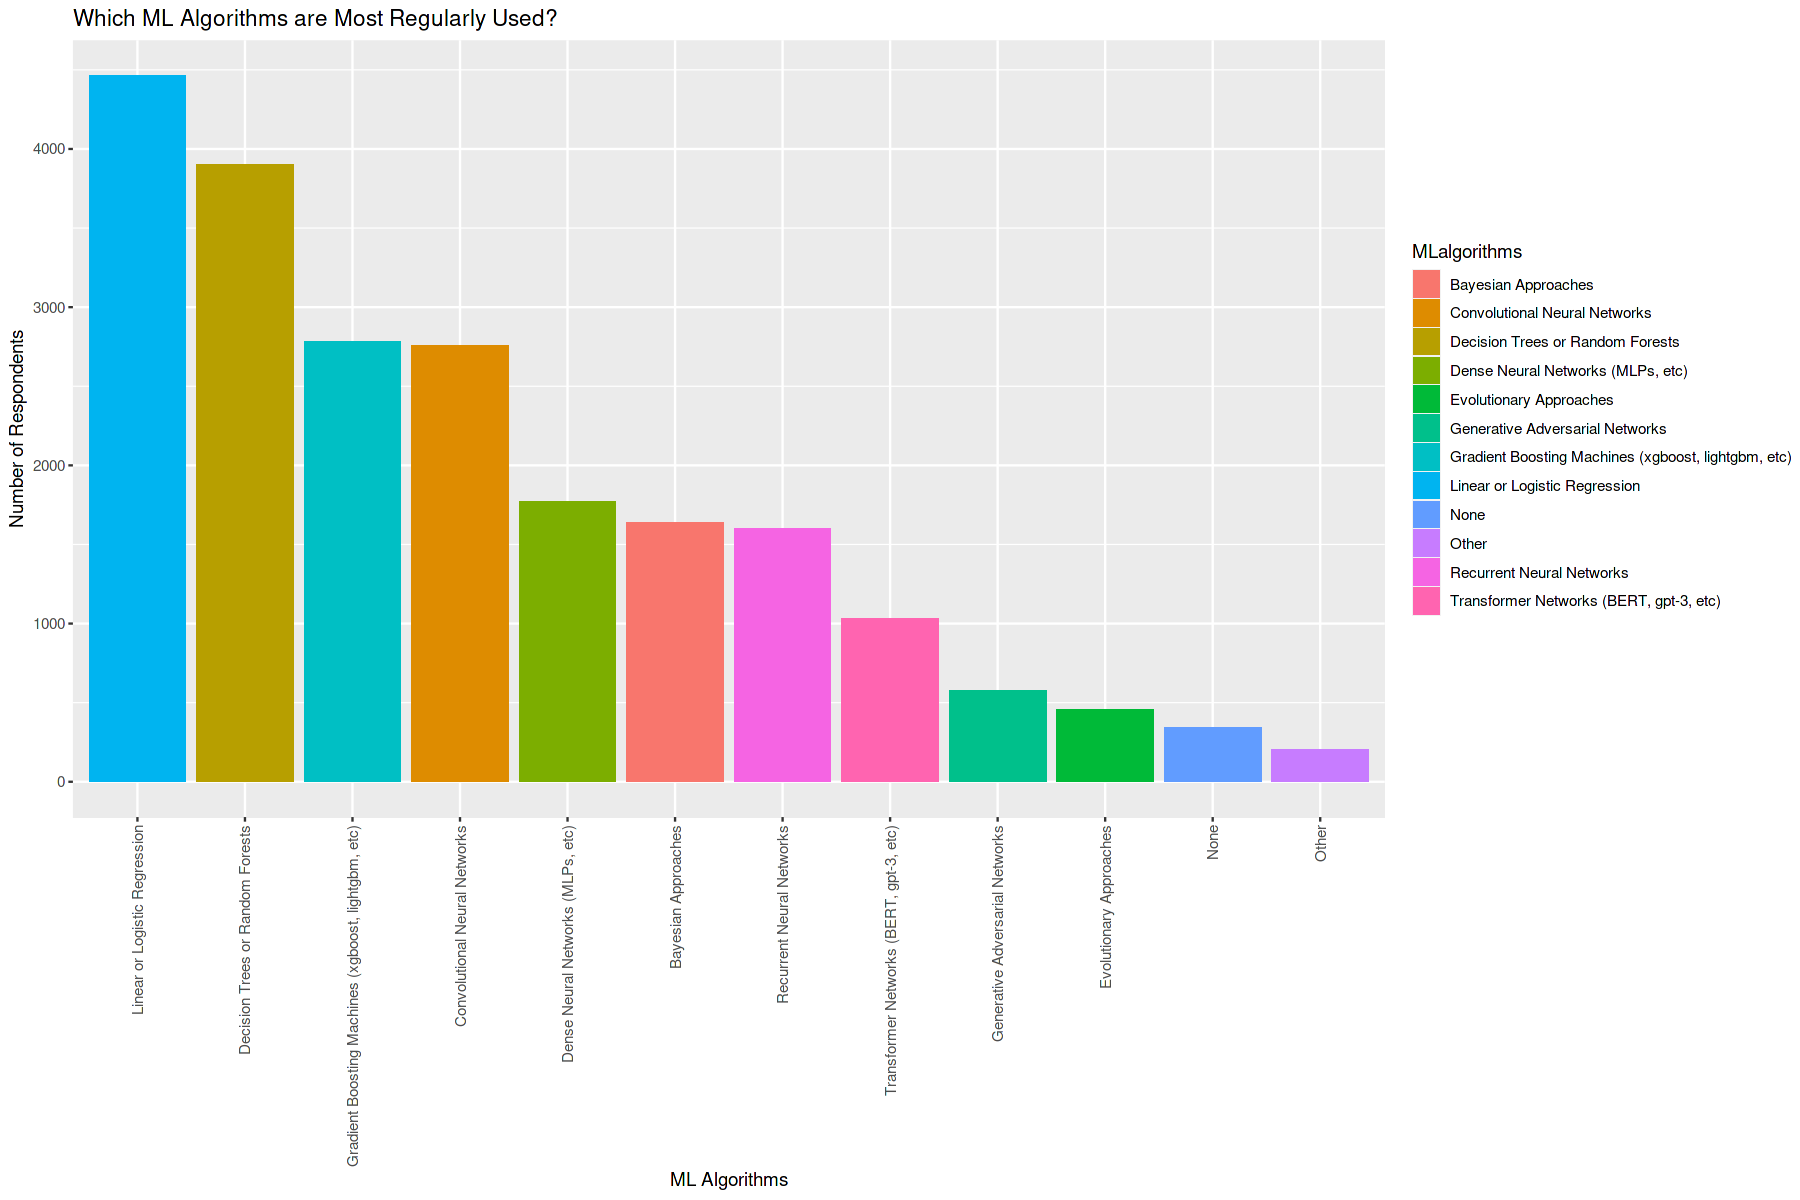

In [13]:
# Interesting, again looks like Python is used quite a bit here with scikit-learn and TensorFlow. However, I did see R has its own options.
# Now let's look at which ML algorithms are the most used by professionals. 

pro_MLalgorithms <- data_pros %>%
  select(Q17_Part_1:Q17_OTHER) %>%
  gather(Q17_Part_1:Q17_OTHER, key = 'key', value = 'MLalgorithms') %>% 
  filter(!is.na(MLalgorithms))

pro_MLalgorithms_count <- pro_MLalgorithms  %>% 
  group_by(MLalgorithms)  %>% 
  summarize(count = n()) %>%
  arrange(desc(count))

options(repr.plot.width=15, repr.plot.height=10)
ggplot(pro_MLalgorithms_count, aes(reorder (MLalgorithms, -count), count)) + 
  geom_bar(aes(fill=MLalgorithms), stat= "identity") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))+
  xlab("ML Algorithms") + ylab("Number of Respondents") +
  labs( title ="Which ML Algorithms are Most Regularly Used?")

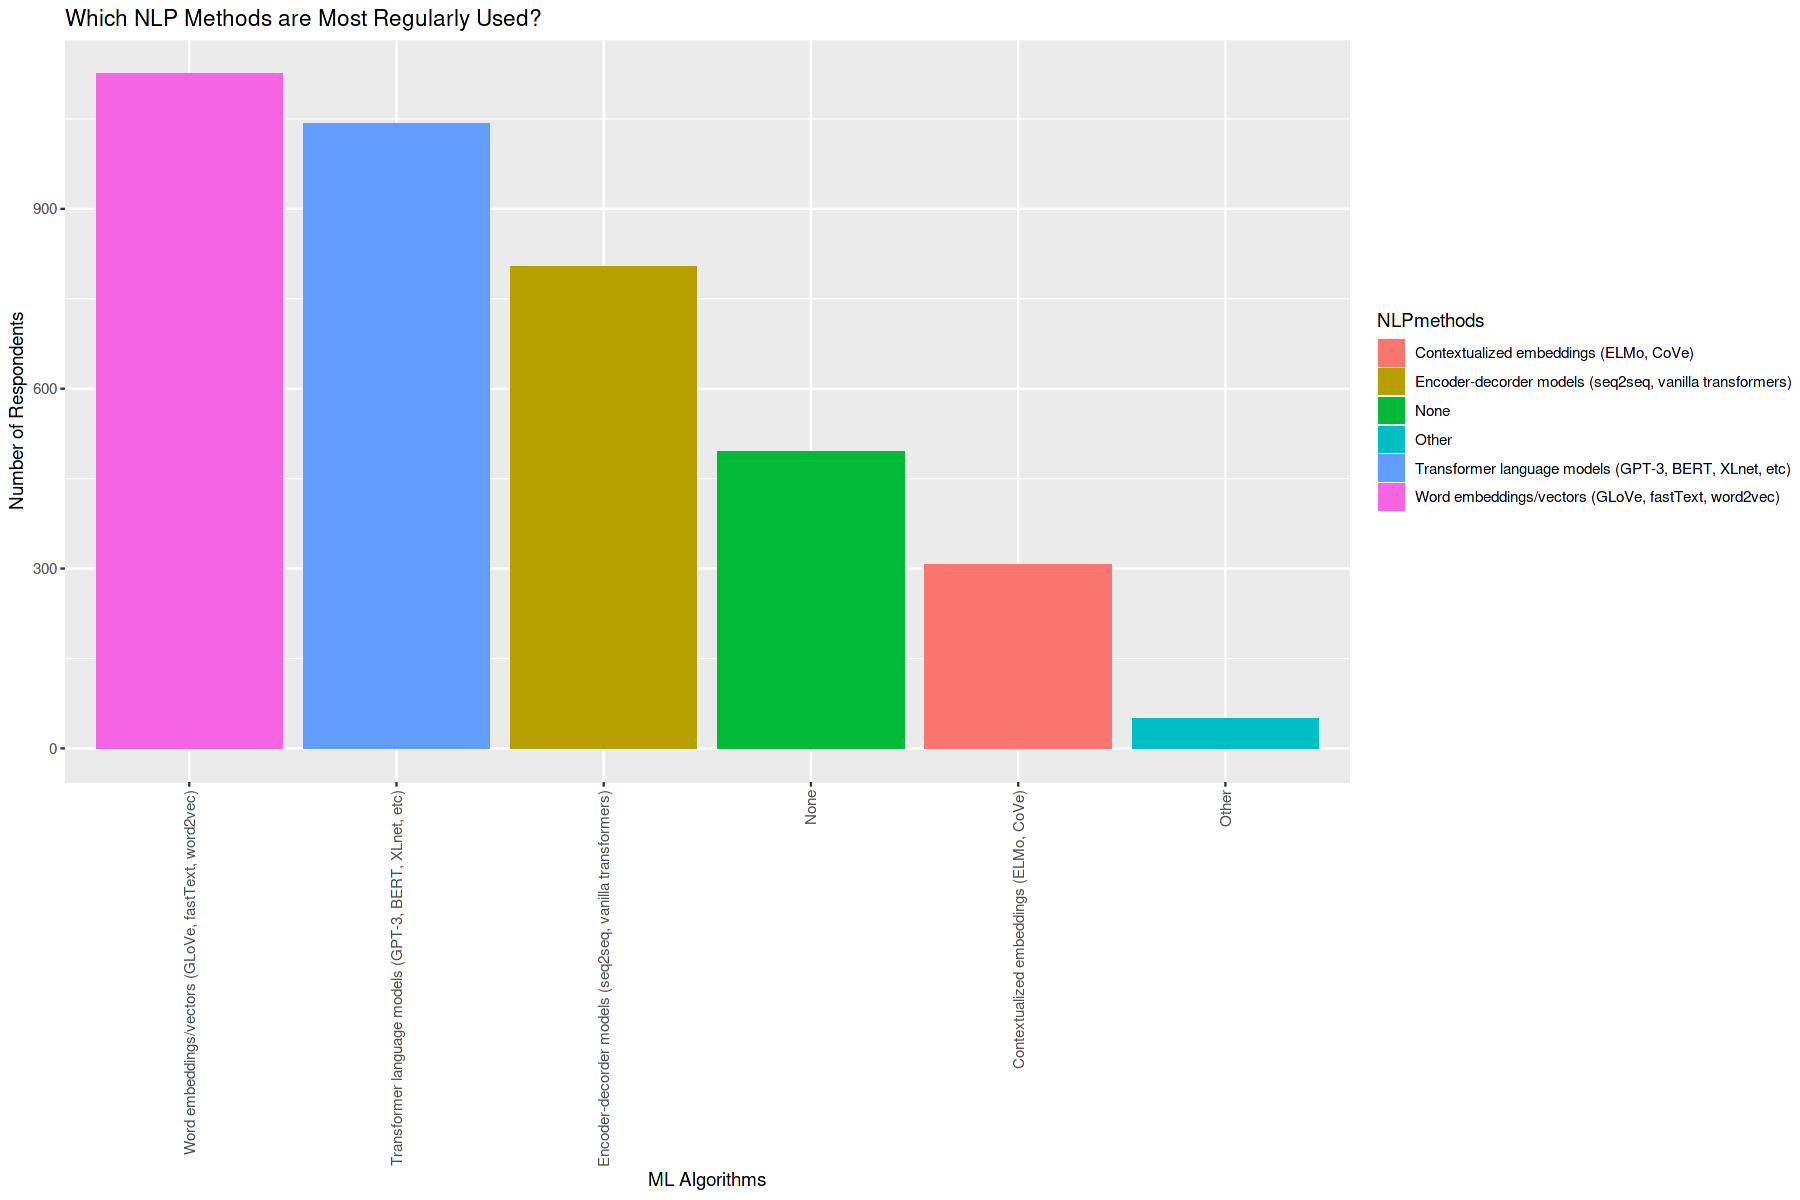

In [14]:
# Another topic I see pop up is Natural Language Processing. I've dabbled with some small learning projects, but I'm curious to see how big of a deal (or not) it is. 
# If it a big deal, which methods ared used most frequently? 

pro_NLPmethods <- data_pros %>%
  select(Q19_Part_1:Q19_OTHER) %>%
  gather(Q19_Part_1:Q19_OTHER, key = 'key', value = 'NLPmethods') %>% 
  filter(!is.na(NLPmethods))

pro_NLPmethods_count <- pro_NLPmethods  %>% 
  group_by(NLPmethods)  %>% 
  summarize(count = n()) %>%
  arrange(desc(count))

options(repr.plot.width=15, repr.plot.height=10)
ggplot(pro_NLPmethods_count, aes(reorder (NLPmethods, -count), count)) + 
  geom_bar(aes(fill=NLPmethods), stat= "identity") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))+
  xlab("ML Algorithms") + ylab("Number of Respondents") +
  labs( title ="Which NLP Methods are Most Regularly Used?")

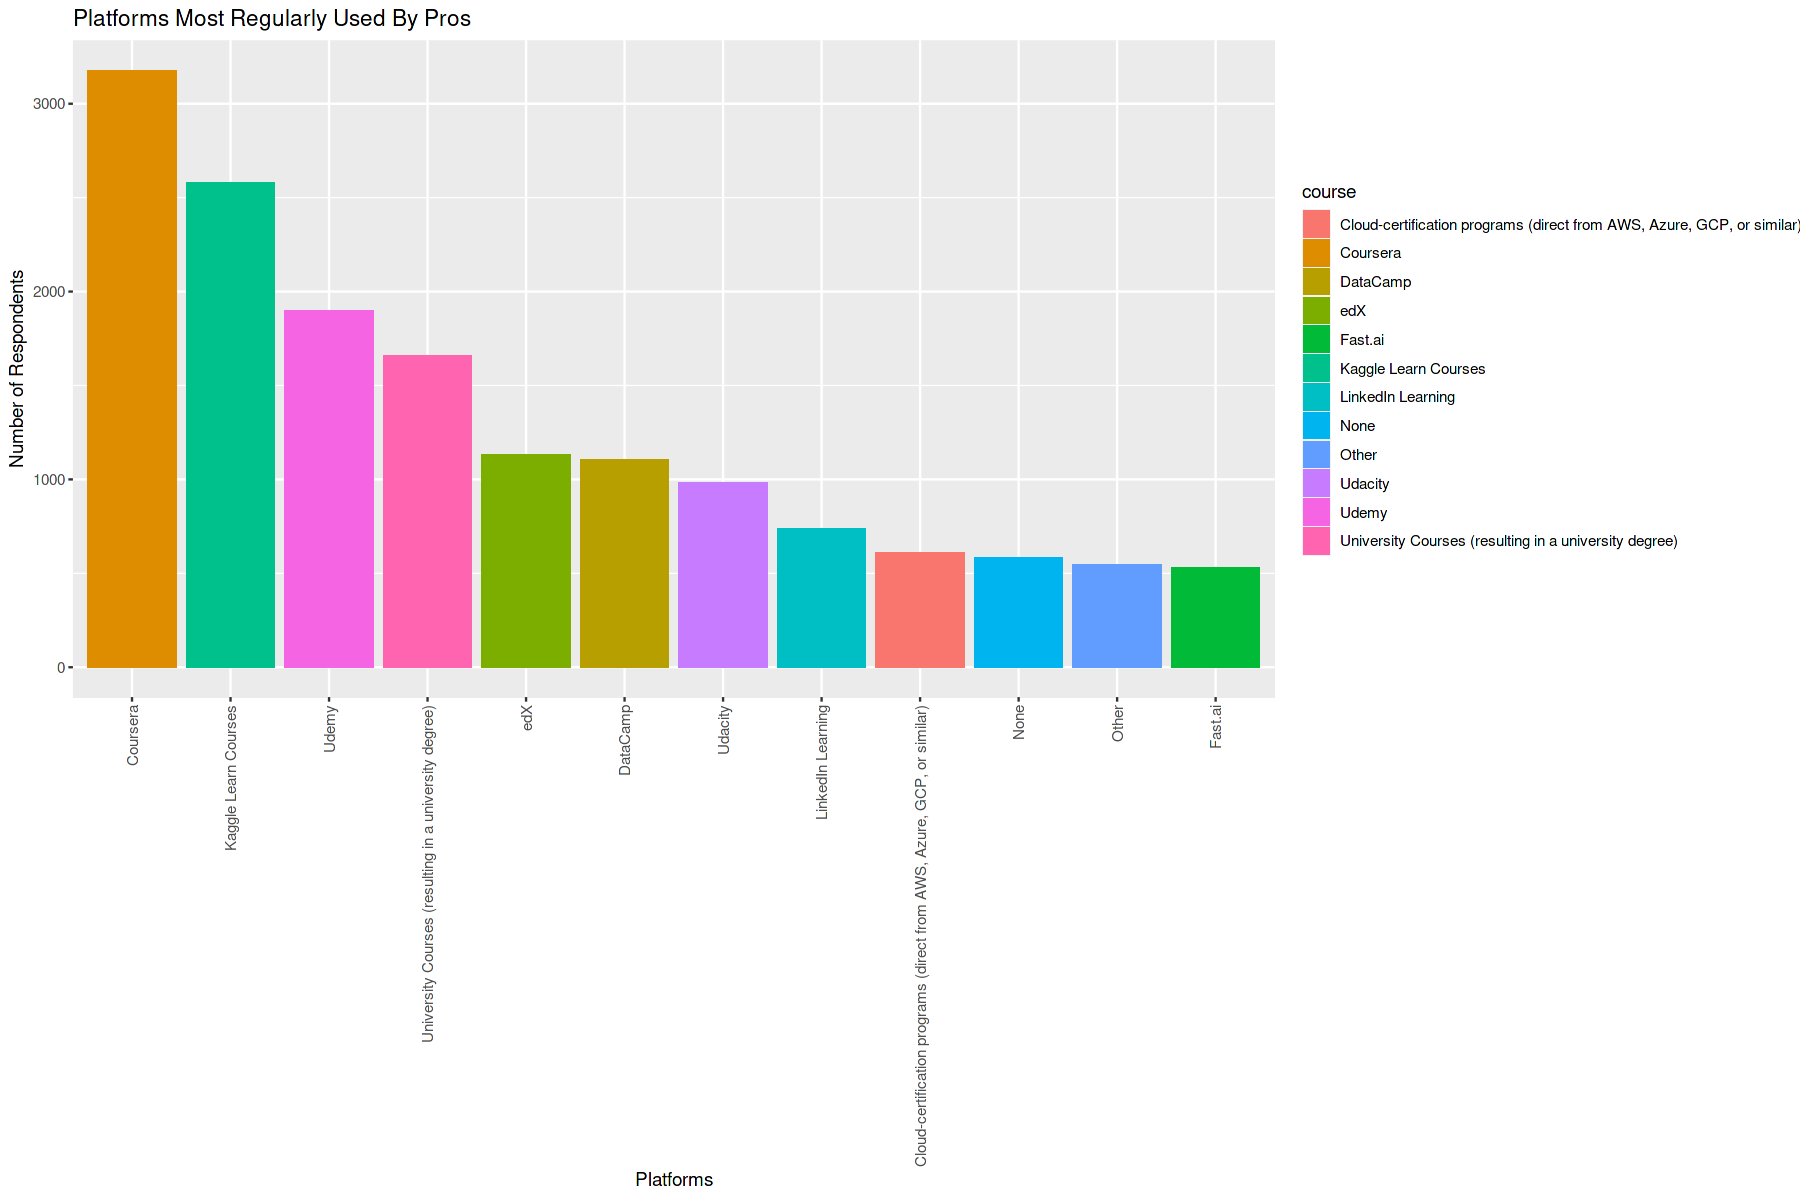

In [15]:
# Hmm...looks like I have some new things to look up, but that's what I like about data analytics and science - discovering new things. Speaking of learning new things, 
# I'd like to know - which learning platforms do professionals use to stay up to date?

pro_platforms <- data_pros %>%
  select(Q40_Part_1:Q40_OTHER) %>%
  gather(Q40_Part_1:Q40_OTHER, key = 'key', value = 'course') %>% 
  filter(!is.na(course))

pro_platform_count <- pro_platforms  %>% 
  group_by(course)  %>% 
  summarize(count = n()) %>%
  arrange(desc(count))

options(repr.plot.width=15, repr.plot.height=10)
ggplot(pro_platform_count, aes(reorder (course, -count), count)) + 
  geom_bar(aes(fill=course), stat= "identity") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
  xlab("Platforms") + ylab("Number of Respondents") +
  labs( title ="Platforms Most Regularly Used By Pros")


This survey was a lot of fun to dig into. It looks like there's not shortage of learning in my near future! 
